In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from IPython.display import display
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
logreg = LogisticRegression().fit(X_train, y_train)
print(f"Training set score: {(logreg.score(X_train, y_train)):.2f}")
print(f"Test set score: {(logreg.score(X_test, y_test)):.2f}")

Training set score: 0.91
Test set score: 0.88


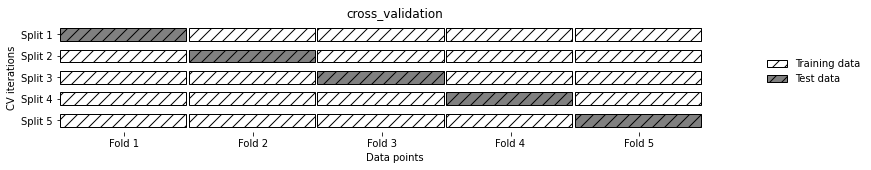

In [2]:
mglearn.plots.plot_cross_validation()

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter = 1000)

scores = cross_val_score(logreg, iris.data, iris.target)
print(f"Cross-validation scores: {scores}")
print(f"scores.shape: {scores.shape}")

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
scores.shape: (5,)


In [4]:
scores = cross_val_score(logreg, iris.data, iris.target, cv = 3)
print(f"Cross-validation scores: {scores}")
print(f"scores.shape: {scores.shape}")

Cross-validation scores: [0.98 0.96 0.98]
scores.shape: (3,)


In [5]:
print(f"Average cross-validation scores: {scores.mean()}")

Average cross-validation scores: 0.9733333333333333


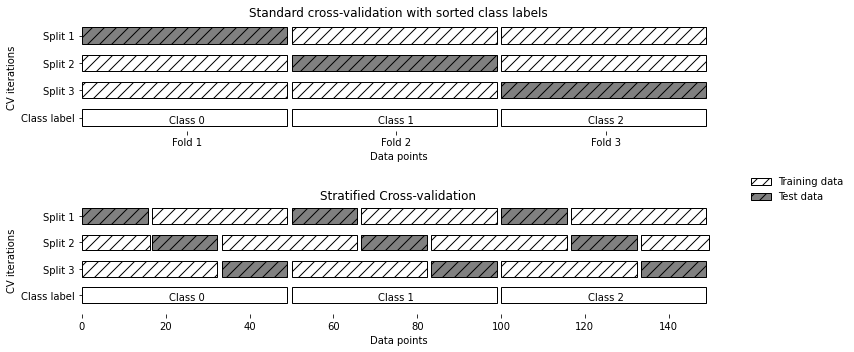

In [6]:
mglearn.plots.plot_stratified_cross_validation()

In [7]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5)
print(f"Cross validation scores:\n{cross_val_score(logreg, iris.data, iris.target, cv = kfold)}")

Cross validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]


In [8]:
kfold = KFold(n_splits = 3)
print(f"Cross validation scores:\n{cross_val_score(logreg, iris.data, iris.target, cv = kfold)}")

Cross validation scores:
[0. 0. 0.]


In [9]:
kfold = KFold(n_splits = 3, shuffle = True, random_state = 0)
print(f"Cross-validation scores:\n{cross_val_score(logreg, iris.data, iris.target, cv = kfold)}")

Cross-validation scores:
[0.98 0.96 0.96]


In [10]:
print(f"Average cross-validation scores: {cross_val_score(logreg, iris.data, iris.target, cv = kfold).mean()}")

Average cross-validation scores: 0.9666666666666667


In [11]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv = loo)
print(f"Number of cv iterations: {len(scores)}")
print(f"Mean accuracy: {(scores.mean())}")

Number of cv iterations: 150
Mean accuracy: 0.9666666666666667


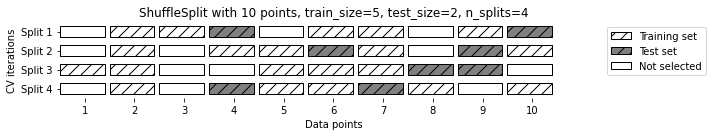

In [12]:
mglearn.plots.plot_shuffle_split()

In [13]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(n_splits = 10, train_size = 0.5, test_size = 0.5)
scores = cross_val_score(logreg, iris.data, iris.target, cv = shuffle_split)
print(f"Cross-validation scores:\n{scores}")

Cross-validation scores:
[0.96       0.97333333 0.96       0.97333333 0.96       0.97333333
 0.93333333 0.96       0.96       0.96      ]


In [14]:
from sklearn.model_selection import GroupKFold

X, y = make_blobs(n_samples = 12, random_state = 0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv = GroupKFold(n_splits = 3))
print(f"Corss-validation scores:\n{scores} ")

Corss-validation scores:
[0.75       0.6        0.66666667] 


C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass groups=[0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


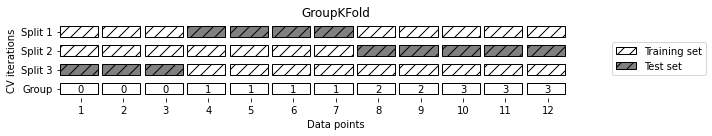

In [15]:
mglearn.plots.plot_group_kfold()

In [16]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
print(f"Size of training set: {X_train.shape[0]}\nSize of test set: {X_test.shape[0]}")

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(C = C, gamma = gamma)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'gamma': gamma, 'C': C}
                
print(f"Best score: {(best_score):.2f}")
print(f"Best parameters: {best_parameters}")

Size of training set: 112
Size of test set: 38
Best score: 0.97
Best parameters: {'gamma': 0.001, 'C': 100}


In [17]:
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state = 1)
print(f"Size of training set: {X_train.shape}, Size of validation set: {X_valid.shape}, Size of test set: {X_test.shape}")

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma = gamma, C = C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'gamma': gamma, 'C': C}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print(f"Best score on validation set: {(best_score)}")
print(f"Best  parameters: {best_parameters}")
print(f"Test set score with best parameters: {(test_score)}")

Size of training set: (84, 4), Size of validation set: (28, 4), Size of test set: (38, 4)
Best score on validation set: 0.9642857142857143
Best  parameters: {'gamma': 0.001, 'C': 10}
Test set score with best parameters: 0.9210526315789473


In [18]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma = gamma, C = C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv = 5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'gamma': gamma, 'C': C}

svc = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=100, gamma=100)

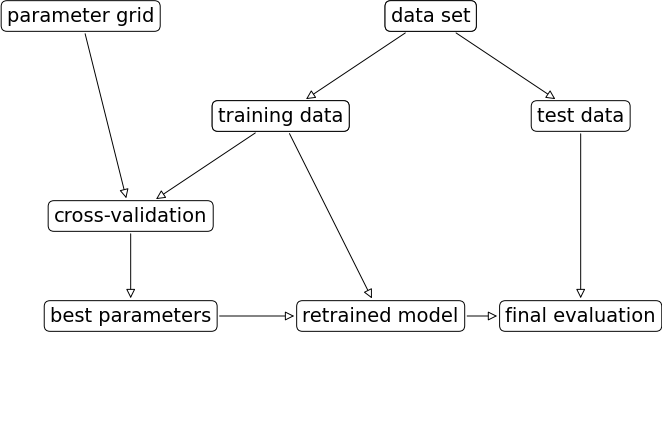

In [19]:
mglearn.plots.plot_grid_search_overview()

In [20]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print(f"Parameter grid:\n{param_grid}")

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv = 5)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)

In [23]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [24]:
print(f"Test set score: {(grid_search.score(X_test, y_test))}")

Test set score: 0.9736842105263158


In [25]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score:{grid_search.best_score_}")

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score:0.9731225296442687


In [26]:
print(f"Best estimator:\n{grid_search.best_estimator_}")

Best estimator:
SVC(C=10, gamma=0.1)


In [27]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000997,9.584308e-07,0.000200,0.000399,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.000798,3.990174e-04,0.000598,0.000488,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.000798,7.466078e-04,0.000399,0.000489,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.000997,6.310531e-04,0.000598,0.000489,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.001396,4.874656e-04,0.000199,0.000397,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


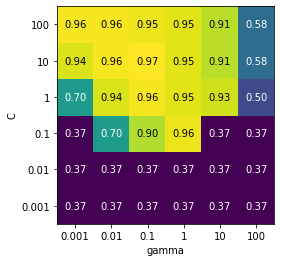

In [28]:
scores = np.array(results.mean_test_score).reshape(6, 6)
mglearn.tools.heatmap(scores, xlabel = 'gamma', xticklabels = param_grid['gamma'], ylabel = 'C', yticklabels = param_grid['C'], cmap = 'viridis')

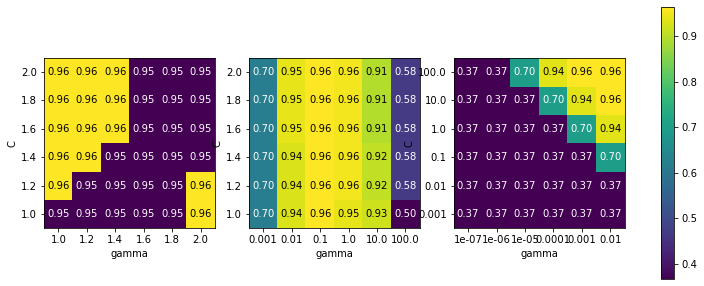

In [29]:
fig, axes = plt.subplots(1, 3, figsize = (13, 5))
param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma': np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma': np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv = 5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, -6)
    scores_image = mglearn.tools.heatmap(scores, xlabel = 'gamma', ylabel = 'C', xticklabels = param_grid['gamma'], yticklabels = param_grid['C'], cmap = 'viridis', ax = ax)
    
plt.colorbar(scores_image, ax = axes.tolist())

In [30]:
param_grid = [{'kernel': ['rbf'],
                'C': [0.001, 0.01, 0.1, 1, 10, 100],
                'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
               {'kernel': ['linear'],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print(f"List of grids:\n{param_grid}")

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [31]:
grid_search = GridSearchCV(SVC(), param_grid, cv = 5)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.9731225296442687


In [32]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.000598,0.000997,0.000798,0.000799,0.000997,0.000997,0.000806,0.000997,0.000851,0.000997,...,0.0,0.000601,0.000996,0.001198,0.000799,0.000598,0.000798,0.0,0.000798,0.000399
std_fit_time,0.000488,0.000003,0.000399,0.000399,0.0,0.000001,0.000403,0.0,0.000293,0.0,...,0.0,0.000491,0.000003,0.000394,0.0004,0.000489,0.000399,0.0,0.000399,0.000489
mean_score_time,0.000798,0.000399,0.000399,0.000198,0.000199,0.000598,0.0002,0.0,0.000399,0.0002,...,0.0,0.000399,0.000399,0.0,0.0,0.0002,0.0,0.0,0.0002,0.0004
std_score_time,0.000399,0.000489,0.000489,0.000397,0.000399,0.000488,0.000399,0.0,0.000489,0.000399,...,0.0,0.000489,0.000489,0.0,0.0,0.000399,0.0,0.0,0.000399,0.000489
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1.0,0.956522,0.869565,0.521739,0.347826,0.869565,1.0,1.0,1.0,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1.0,0.956522


In [33]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv = 5), iris.data, iris.target, cv = 5)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")

Cross-validation scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean cross-validation score: 0.9800000000000001


In [34]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from IPython.display import display
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.target[:15])

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4]


In [35]:
y = digits.target == 9

In [36]:
print(y[:15])

[False False False False False False False False False  True False False
 False False False]


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 0)

In [38]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print(f"Unique predicted labels: {np.unique(pred_most_frequent)}")
print(f"Test score: {(dummy_majority.score(X_test, y_test)):.2f}")

Unique predicted labels: [False]
Test score: 0.90


In [39]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print(f"Test score: {(tree.score(X_test, y_test)):.2f}")

Test score: 0.92


In [40]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print(f"dummy score: {(dummy.score(X_test, y_test)):.2f}")

logreg = LogisticRegression(C = 0.1, max_iter = 1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print(f"logreg score: {(logreg.score(X_test, y_test)):.2f}")

dummy score: 0.90
logreg score: 0.98


In [41]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print(f"Confusion matrix:\n{confusion}")

Confusion matrix:
[[402   1]
 [  6  41]]


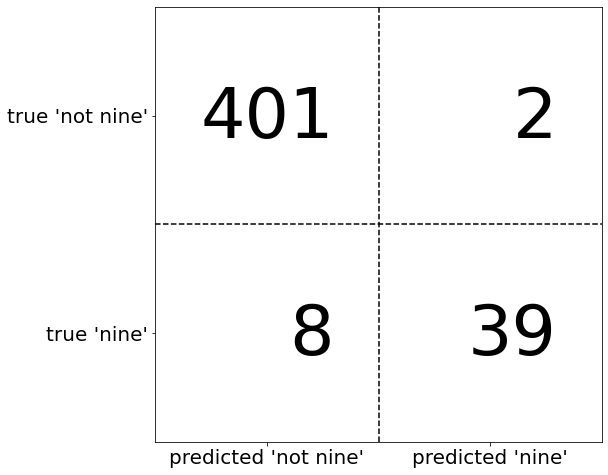

In [42]:
mglearn.plots.plot_confusion_matrix_illustration()

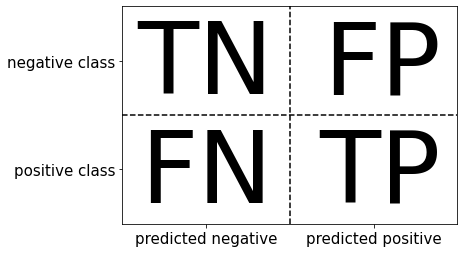

In [43]:
mglearn.plots.plot_binary_confusion_matrix()

In [44]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[403   0]
 [ 47   0]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[402   1]
 [  6  41]]


In [45]:
from sklearn.metrics import f1_score
print(f"f1 score most frequent: {f1_score(y_test, pred_most_frequent)}")
print(f"f1 score dummy: {f1_score(y_test, pred_dummy)}")
print(f"f1 score tree: {f1_score(y_test, pred_tree)}")
print(f"f1 score logistic regression: {f1_score(y_test, pred_logreg)}")

f1 score most frequent: 0.0
f1 score dummy: 0.0
f1 score tree: 0.5542168674698795
f1 score logistic regression: 0.9213483146067415


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
 target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
print(classification_report(y_test, pred_dummy,
 target_names=["not nine", "nine"]))
print(classification_report(y_test, pred_logreg,
 target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
from mglearn.datasets import make_blobs
from sklearn.svm import SVC

X, y = make_blobs(n_samples = (400, 50), centers = 2, cluster_std=[7.0, 2], random_state = 22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
svc = SVC(gamma = 0.5).fit(X_train, y_train)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


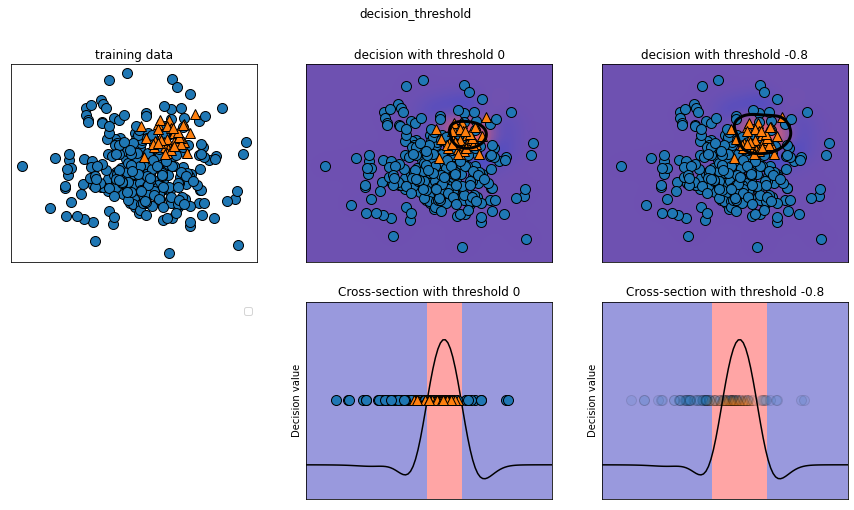

In [49]:
mglearn.plots.plot_decision_threshold()

In [50]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       104
           1       0.20      0.33      0.25         9

    accuracy                           0.84       113
   macro avg       0.57      0.61      0.58       113
weighted avg       0.88      0.84      0.86       113



In [51]:
y_pred_lower_threshold = svc.decision_function(X_test) > -0.8

In [52]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89       104
           1       0.31      1.00      0.47         9

    accuracy                           0.82       113
   macro avg       0.66      0.90      0.68       113
weighted avg       0.95      0.82      0.86       113



In [53]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


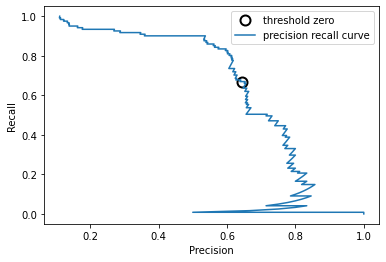

In [54]:
X, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
 y_test, svc.decision_function(X_test))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
 label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

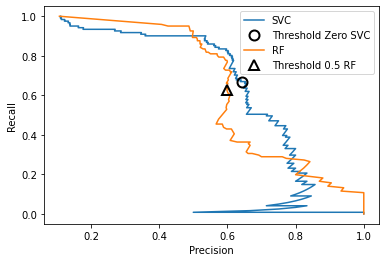

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 0, max_features = 2)
rf.fit(X_train, y_train)

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label = 'SVC')
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize = 10, label = 'Threshold Zero SVC', fillstyle = 'none', c = 'k', mew = 2)

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf, recall_rf, label = 'RF')
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c = 'k', markersize = 10, label = "Threshold 0.5 RF", fillstyle = 'none', mew = 2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc = 'best')

In [56]:
from sklearn.metrics import f1_score
print(f"f1_score of random forest: {(f1_score(y_test, rf.predict(X_test))):.3f}")
print(f"f1_score of SVC: {(f1_score(y_test, svc.predict(X_test))):.3f}")

f1_score of random forest: 0.610
f1_score of SVC: 0.656


In [57]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print(f"Average precision of random forest: {(ap_rf):.3f}")
print(f"Average precision of SVC: {(ap_svc):.3f}")

Average precision of random forest: 0.660
Average precision of SVC: 0.666


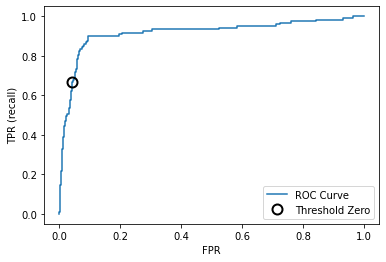

In [58]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label = 'ROC Curve')
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize = 10, label = 'Threshold Zero', fillstyle = 'none', c = 'k', mew = 2)
plt.legend(loc = 4)

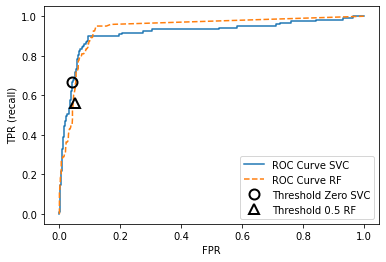

In [59]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, '--', label="ROC Curve RF")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="Threshold Zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10, label="Threshold 0.5 RF", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [60]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print(f"AUC for Random Forest: {(rf_auc):.3f}")
print(f"AUC for SVC: {(svc_auc):.3f}")

AUC for Random Forest: 0.937
AUC for SVC: 0.916


gamma = 1.00, accuracy = 0.90, AUC = 0.50
gamma = 0.05, accuracy = 0.90, AUC = 1.00
gamma = 0.01, accuracy = 0.90, AUC = 1.00


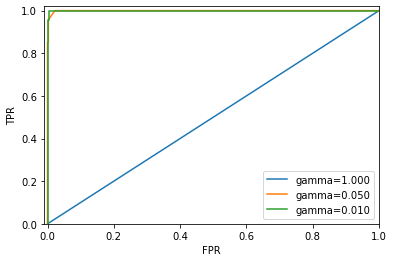

In [61]:
from sklearn.metrics import roc_auc_score
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma = gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print(f"gamma = {(gamma):.2f}, accuracy = {(accuracy):.2f}, AUC = {(auc):.2f}")
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

In [63]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
lr = LogisticRegression(max_iter = 10000).fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.953
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


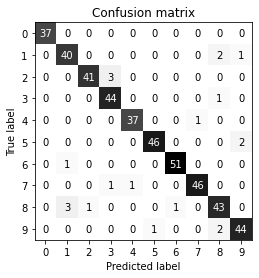

In [64]:
scores_image = mglearn.tools.heatmap(
 confusion_matrix(y_test, pred), xlabel='Predicted label',
 ylabel='True label', xticklabels=digits.target_names,
 yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [65]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.92      0.98      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.90      0.90      0.90        48
           9       0.94      0.94      0.94        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [66]:
print("Micro average f1 score: {:.3f}".format(
 f1_score(y_test, pred, average="micro")))
print("Macro average f1 score: {:.3f}".format(
 f1_score(y_test, pred, average="macro")))

Micro average f1 score: 0.953
Macro average f1 score: 0.954


In [67]:
print("Default scoring: {}".format(cross_val_score(SVC(), digits.data, digits.target == 9)))

Default scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]


In [69]:
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="accuracy")
print("Explicit accuracy scoring: {}".format(explicit_accuracy))

Explicit accuracy scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]


In [70]:
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="roc_auc")
print("AUC scoring: {}".format(roc_auc))

AUC scoring: [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [71]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state=0)
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy)): 0.976
Test set AUC: 0.992
Test set accuracy: 0.973


In [76]:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("\nGrid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))


Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.998
Test set AUC: 1.000
Test set accuracy: 1.000
